In [1]:
pip install rdkit-pypi

Note: you may need to restart the kernel to use updated packages.


In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

In [2]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [3]:
from urllib.request import urlopen
from urllib.parse import quote

def CIRconvert(ids):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(ids) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'


Enter Chemical Name : butane
CCCC


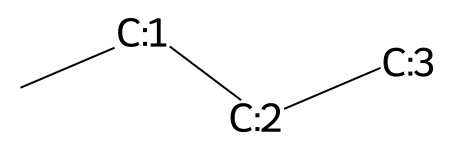

In [29]:
c_name1 = input("Enter Chemical Name : ")
s_formula1 = CIRconvert(c_name1)
print(s_formula1)
mol1 = Chem.MolFromSmiles(s_formula1)
# Default
# mol1
mol_with_atom_index(mol1)

Enter Chemical Name : butane
CCCC


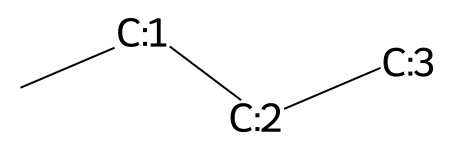

In [30]:
c_name2 = input("Enter Chemical Name : ")
s_formula2 = CIRconvert(c_name2)
print(s_formula2)
mol2 = Chem.MolFromSmiles(s_formula2)
mol_with_atom_index(mol2)

In [31]:
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions
isomers = tuple(EnumerateStereoisomers(mol1))
len(isomers)

1

In [32]:
for smi in sorted(Chem.MolToSmiles(x, isomericSmiles=True) for x in isomers):
    print(smi)
    isomer = Chem.MolFromSmiles(smi)
    mol_with_atom_index(isomer)

C[CH2:1][CH2:2][CH3:3]


In [33]:
pip install pysmiles

Note: you may need to restart the kernel to use updated packages.


In [34]:
from pysmiles import read_smiles
import networkx as nx
    
# smiles = 'CCCC'
mol_1 = read_smiles(s_formula1)
mol_2 = read_smiles(s_formula2)
    
# atom vector (C only)
nodes_c1 = mol_1.nodes(data='element')
nodes_c2 = mol_2.nodes(data='element')

# adjacency matrix
adj_matrix_c1 = nx.to_numpy_matrix(mol_1)
adj_matrix_c2 = nx.to_numpy_matrix(mol_2)

print(nodes_c1)
print(adj_matrix_c1)

print(nodes_c2)
print(adj_matrix_c2)

[(0, 'C'), (1, 'C'), (2, 'C'), (3, 'C')]
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]]
[(0, 'C'), (1, 'C'), (2, 'C'), (3, 'C')]
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]]


In [11]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [35]:
from networkx.algorithms import isomorphism
G1 = nx.from_numpy_matrix(adj_matrix_c1)
G2 = nx.from_numpy_matrix(adj_matrix_c2)
GM = isomorphism.GraphMatcher(G1, G2)
GM.is_isomorphic()


True

In [52]:
x = (adj_matrix_c1==adj_matrix_c2).all()
if x:
    print('True')
    x = adj_matrix_c1.shape
    print(type(x))

True
<class 'tuple'>


In [76]:
def degrees(adj_matrix)
    n = adj_matrix.shape[0]
    degree_sequence = []
    y = np.asarray(adj_matrix)
    for i in range(n):
        count = np.count_nonzero(y[i] == 1)
        degree_sequence.append(count)
    return degree_sequence

[1, 2, 2, 1]

In [79]:
def GraphMatcher(adj_matrix_c1, adj_matrix_c2):
    adj_matrix_equal = (adj_matrix_c1==adj_matrix_c2).all()
    if adj_matrix_equal:
        return True
    else:
        nodes_equal = adj_matrix_c1.shape == adj_matrix_c1.shape
        if nodes_equal:
            if degrees(adj_matrix_c1) == degrees(adj_matrix_c2):
                if degrees(adj_matrix_c1.sort()) == degrees(adj_matrix_c2.sort()):
                    return True
                else:
                    return False
        else:
            return False

        
GraphMatcher(adj_matrix_c1, adj_matrix_c2)

True